# Сессия 1

### 1.1 Парсинг данных

Описание библиотек:

1) pandas для работы с данными numpy для валоиморовал;

2) matplotlib, seaborn, plotly  для работы с графиками;

3) datetime для даты и времени;

4) MinMaxScaler для нормализаций;

5) KMeans, GaussianMixture, Birch для кластеризаций;

6) PCA метод главных компонентов;

7) silhouette_score, calinski_harabasz_score, davies_bouldin_score метрики для оценки кластеризаций;

8) warnings для игнорирования предупреждений.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.set_option('display.max_columns', 70)

Находим репозиторий с нужным csv файлом и считываем его в dataframe

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [4]:
print(df.shape)
df.head(10)

(376917, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,

Итого мы имеем структуру данных о заражённых в разных странах и городах. В таблице имеется 373437 строк данных и 67 признаков.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376917 entries, 0 to 376916
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    376917 non-null  object 
 1   continent                                   358886 non-null  object 
 2   location                                    376917 non-null  object 
 3   date                                        376917 non-null  object 
 4   total_cases                                 338085 non-null  float64
 5   new_cases                                   366116 non-null  float64
 6   new_cases_smoothed                          364886 non-null  float64
 7   total_deaths                                316113 non-null  float64
 8   new_deaths                                  366124 non-null  float64
 9   new_deaths_smoothed                         364894 non-null  float64
 

Просмотрев информацию о DataFrame, можно увидеть, что в некоторых столбцах пропущено множество значений. Далее, можно просмотреть, какие значения слишком мало, и решить, заполнять пропущенные значения или исключать признаки из выборки. В данном DataFrame имеется 5 признаков типа object, а остальные 62 признака имеют тип float64, что упрощает работу с данными, так как не нужно преобразовывать типы.

### 1.2 Предобработка данных и выделение значимых атрибутов

Для начала выделения главных атрибутов в DataFrame и работы с пропущенными значениями можно использовать следующие шаги:

    1) Исключение столбцов с большим количеством пропусков.
    2) Оценка корреляции столбцов.
    3) Просмотр определений столбцов и оставление логически нужных.

Ну и начнём по плану с __определения признаков с пустыми значениями__.

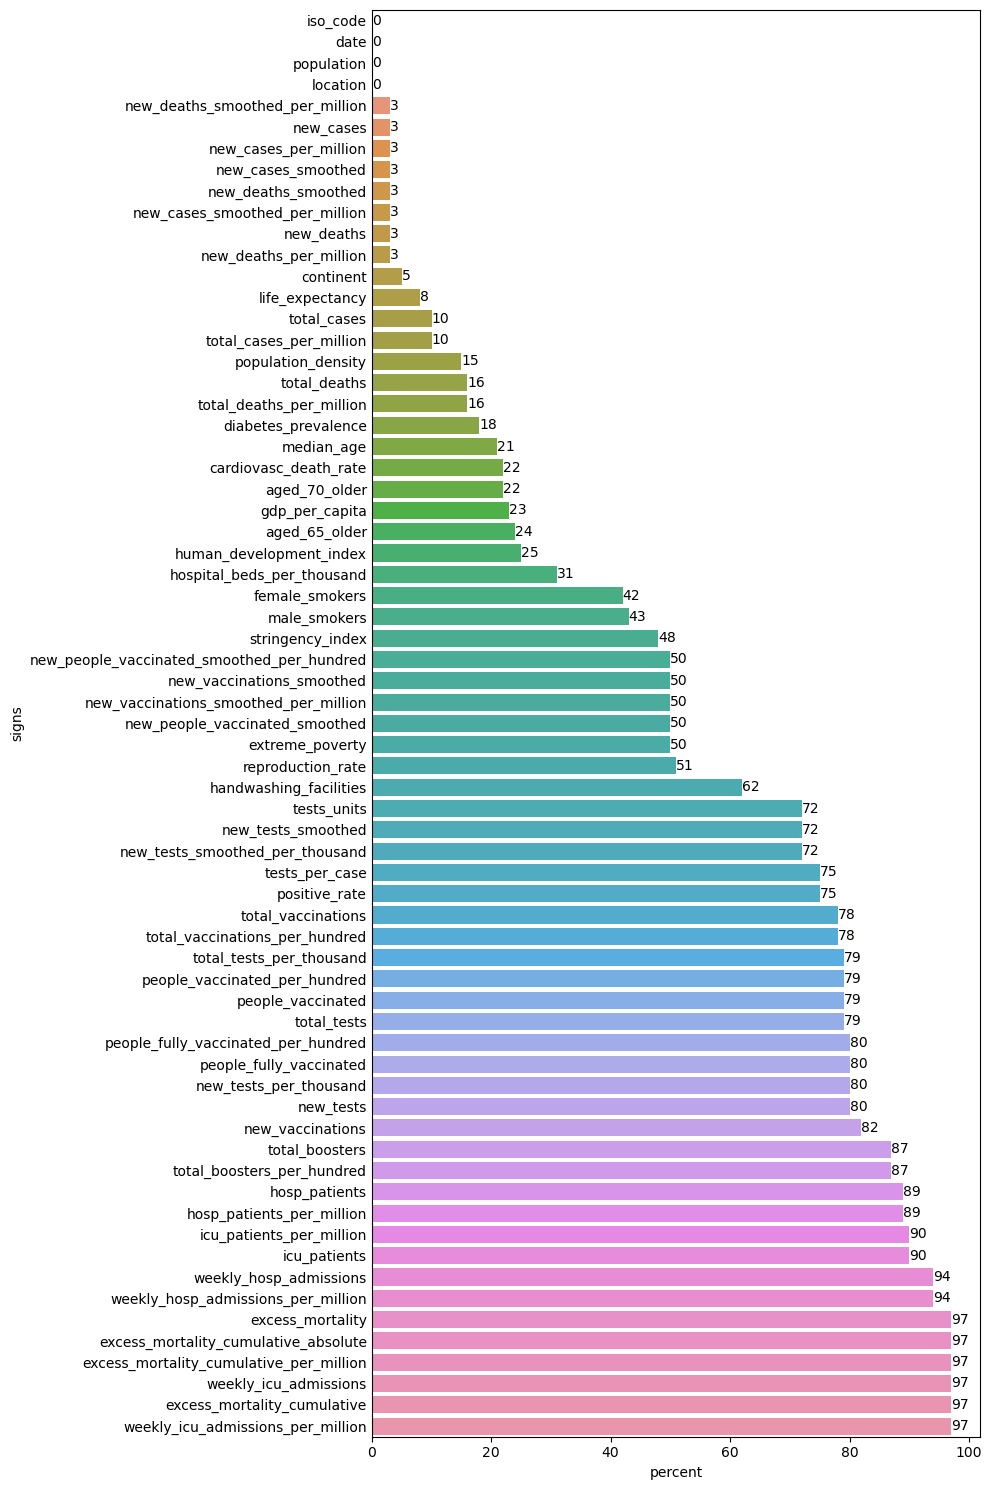

In [6]:
# Датафрейм для просмотра пустых значений
data_nan = pd.DataFrame()

columns = df.columns
data_nan.index = columns
data_nan['signs'] = columns
# Высчитываем процент пустых значений
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)

# Строим график
plt.figure(figsize=(10, 15))
ax = sns.barplot(data=data_nan, y='signs', x='percent', 
                 order=data_nan.groupby('signs')['percent'].agg('mean').sort_values(ascending=True).index )
ax.tick_params(axis='y', length=0)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()
plt.show()

На графике можно увидеть признаки и процент пустых значений в них. Наблюдаются признаки с 75% и более процентами пропусков. Возможно, эти признаки записывались как необязательные, либо эти данные были просто неизвестны. Далее, необходимо выделить признаки с более чем 75% пропусков и проанализировать их.

In [7]:
# Список для нужнных атрибутов
need_signs = list(df.columns)

print('Признаки с процентом от 75%:' )
sum = 0
for i in data_nan[data_nan['percent'] >= 75].index:
    sum+=1
    print('\t' + i)
    need_signs.remove(i)
print(f'Итого {sum} признаков.')

Признаки с процентом от 75%:
	icu_patients
	icu_patients_per_million
	hosp_patients
	hosp_patients_per_million
	weekly_icu_admissions
	weekly_icu_admissions_per_million
	weekly_hosp_admissions
	weekly_hosp_admissions_per_million
	total_tests
	new_tests
	total_tests_per_thousand
	new_tests_per_thousand
	positive_rate
	tests_per_case
	total_vaccinations
	people_vaccinated
	people_fully_vaccinated
	total_boosters
	new_vaccinations
	total_vaccinations_per_hundred
	people_vaccinated_per_hundred
	people_fully_vaccinated_per_hundred
	total_boosters_per_hundred
	excess_mortality_cumulative_absolute
	excess_mortality_cumulative
	excess_mortality
	excess_mortality_cumulative_per_million
Итого 27 признаков.


У данных признаков имеется большое количество пропущенных значений, которые нельзя заменить средними значениями. Так как эти признаки не будут влиять на кластеры, их необходимо исключить из выборки. Среди этих признаков:

    8 признаков, связанных с людьми, попавшими в больницу из-за COVID-19. Так как анализ фокусируется на уровне опасности, а не на статистике лечения, эти данные не нужны.
    
    4 признака, связанных с тестами на болезнь, также не интересуют.
    
    9 признаков, связанных с вакцинацией. Так как здесь нет информации о выздоровевших людях, эти столбцы также не важны.
    
    4 признака о реальном количестве смертей и прогнозируемом количестве на 2020 год. На данный момент важна текущая ситуация, поэтому эти столбцы не нужны.

Так же вместе с этими признаками удалить столбцы 'new_tests_smoothed' и 'new_tests_smoothed_per_thousand', так как в них процент пропусков составляет 72 % (достаточно много), и эти данные не являются важными, поскольку количество сданных тестов не влияет на уровень опасности нахождения в стране/городе.

In [8]:
need_signs.remove('new_tests_smoothed')
need_signs.remove('new_tests_smoothed_per_thousand')

__Также посмотрим корреляцию признаков.__

In [9]:
df[need_signs].corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
total_cases,1.000000,0.145428,0.386464,0.941086,0.109457,0.292505,0.066609,-0.000156,-0.000427,0.095146,-0.004918,-0.013616,0.019781,0.272509,-0.056498,0.205596,-0.056721,-0.109670,-0.014947,0.047762,0.045938,0.043532,0.022487,-0.041539,-0.046308,-0.001855,-0.001805,0.006128,0.034331,0.019525,0.022247,0.049846,0.669877
new_cases,0.145428,1.000000,0.376413,0.171926,0.505929,0.188320,-0.000553,0.098858,0.030766,0.008574,0.063705,0.015027,0.009397,0.144634,0.007313,0.105779,-0.003272,0.007285,-0.003374,0.013004,0.012487,0.011819,0.006101,-0.010376,-0.012101,-0.001414,-0.001337,0.002705,0.008417,0.005678,0.006347,0.012674,0.156807
new_cases_smoothed,0.386464,0.376413,1.000000,0.457032,0.187355,0.500304,-0.001481,0.030181,0.081736,0.022786,0.014503,0.039921,0.022301,0.379674,0.017607,0.278870,-0.009118,0.017457,-0.008960,0.034540,0.033170,0.031393,0.016204,-0.027573,-0.032142,-0.003756,-0.003550,0.007189,0.022352,0.015086,0.016852,0.033665,0.417273
total_deaths,0.941086,0.171926,0.457032,1.000000,0.175532,0.469422,0.021860,-0.001860,-0.005083,0.111774,-0.000722,-0.002009,0.026171,0.454546,-0.024379,0.376968,-0.033842,-0.046536,-0.019583,0.036457,0.031784,0.029140,0.009439,-0.047306,-0.040457,0.004120,-0.008504,-0.000962,0.044391,-0.003004,0.013451,0.044176,0.748683
new_deaths,0.109457,0.505929,0.187355,0.175532,1.000000,0.374478,-0.019131,0.049218,0.007844,0.000364,0.150046,0.044078,0.011222,0.245657,0.019251,0.238284,0.014792,0.059151,-0.005770,0.012957,0.011850,0.010970,0.004782,-0.014787,-0.013774,-0.001247,-0.002258,-0.000152,0.012653,-0.000883,0.004649,0.014793,0.227494
new_deaths_smoothed,0.292505,0.188320,0.500304,0.469422,0.374478,1.000000,-0.051140,0.007734,0.020943,0.000964,0.042692,0.117706,0.027422,0.660758,0.052110,0.639705,0.040227,0.156260,-0.015354,0.034494,0.031553,0.029206,0.012733,-0.039431,-0.036670,-0.003319,-0.006018,-0.000405,0.033666,-0.002352,0.012369,0.039389,0.608514
total_cases_per_million,0.066609,-0.000553,-0.001481,0.021860,-0.019131,-0.051140,1.000000,0.058213,0.157901,0.558074,-0.001495,-0.004175,-0.036688,-0.074565,-0.155041,-0.075482,-0.189627,-0.420974,0.111311,0.503025,0.487156,0.483018,0.430575,-0.360364,-0.270193,0.089000,0.421643,0.056106,0.445907,0.310630,0.458547,0.519401,-0.075001
new_cases_per_million,-0.000156,0.098858,0.030181,-0.001860,0.049218,0.007734,0.058213,1.000000,0.369251,0.034137,0.288770,0.089945,0.035405,-0.006247,0.038672,-0.008325,-0.002682,-0.003524,0.018995,0.088653,0.087541,0.086586,0.068669,-0.057570,-0.047024,0.012741,0.064261,0.006182,0.042924,0.044416,0.059044,0.084555,-0.008500
new_cases_smoothed_per_million,-0.000427,0.030766,0.081736,-0.005083,0.007844,0.020943,0.157901,0.369251,1.000000,0.093265,0.088466,0.243581,0.070172,-0.017812,0.098624,-0.023127,-0.004114,-0.017412,0.051725,0.243485,0.240427,0.237704,0.186974,-0.157168,-0.128406,0.034726,0.176482,0.016994,0.114641,0.121296,0.159983,0.230846,-0.023057
total_deaths_per_million,0.095146,0.008574,0.022786,0.111774,0.000364,0.000964,0.558074,0.034137,0.093265,1.000000,0.048087,0.133485,0.019381,-0.047169,-0.043570,-0.050155,-0.089129,-0.290692,0.011802,0.505324,0.495962,0.495545,0.193661,-0.397196,-0.130982,0.025146,0.464974,0.126102,0.471176,0.286794,0.391847,0.455742,-0.057688


Есть множество хорошо коррелирующих признаков, к примеру 0.94 у total_cases (общее количество случаев заражений) и total_deaths(общее количество смертей), и это нормальная корреляция, так как логично, что чем больше заражений тем больше смертей. Но так же можно увидеть корреляцию в 0.99 у признаков aged_65_older и aged_70_older причём в описании дано понять, что люди старше 70-ти собраны за 2015 год, нам эти данные не нужны, поэтому исключим этот признак и избежим мультиколлиниарности.

In [10]:
need_signs.remove('aged_70_older')

__Теперь посмотрим на признаки со стороны логики.__

Можно оставить данные о локациях и времени для будущего использования в выборке для кластеризации. Также можно удалить ненужные атрибуты: iso_code (так как это та же локация, но в буквах), tests_units (так как у него строковый тип и он может помешать), и continent (так как по нему не нужно просчитывать опасность).

In [11]:
# Удаляем из скписака не нужные атрибуты
need_signs.remove('iso_code')
need_signs.remove('continent')
need_signs.remove('tests_units')

Признаки: cardiovasc_death_rate (уровень смертности от сердечно-сосудистых заболеваний в 2017 году), diabetes_prevalence (распространенность сахарного диабета в 2017 году), life_expectancy (ожидаемая продолжительность жизни при рождении в 2019 году) также являются бесполезными для измерения опасности и их следует исключить из выборки

In [12]:
need_signs.remove('cardiovasc_death_rate')
need_signs.remove('diabetes_prevalence')
need_signs.remove('life_expectancy')

__Выделенные атрибуты.__

In [13]:
print(len(need_signs))
need_signs

31


['location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'new_vaccinations_smoothed',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'gdp_per_capita',
 'extreme_poverty',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'human_development_index',
 'population']

В итоге мы оставляем в выборке 33 признака, путём отбора принаков которые логичестки подходят под заданное условие, которые имееют достаточное количество данных, и так же которые не будут создавать помехи(из-за мультиколлинеарности) для класстеризаций.

### 1.3 Описание структуры набора данных


#### Подтверждённые случай
__total_cases__ -	Общее количество подтвержденных случаев COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщалось.

__new_cases__	Новые подтвержденные случаи COVID-19. Подсчет может включать вероятные случаи, о которых сообщалось. В редких случаях, когда наш источник сообщает о негативном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

__new_cases_smoothed__	Новые подтвержденные случаи COVID-19 (сглажены за 7 дней). Подсчеты могут включать вероятные случаи, о которых сообщалось.

__total_cases_per_million__	Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщается.

__new_cases_per_million__	Новые подтвержденные случаи COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщалось.

__new_cases_smoothed_per_million__	Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщалось.

#### Подтверждённые случай смерти

__total_deaths__	Общее количество смертей, связанных с COVID-19. Подсчеты могут включать вероятные смерти, если о них сообщается.

__new_deaths__	Новые случаи смерти, связанные с COVID-19. Подсчет может включать вероятные случаи смерти, о которых сообщалось. В редких случаях, когда наш источник сообщает о отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем этот показатель равным NA.

__new_deaths_smoothed__	Новые случаи смерти, связанные с COVID-19 (сглажены за 7 дней). Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

__total_deaths_per_million__	Общее количество смертей, связанных с COVID-19, на 1 000 000 человек. Подсчеты могут включать вероятные смерти, если о них сообщается.

__new_deaths_per_million__	Новые случаи смерти, связанные с COVID-19, на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

__new_deaths_smoothed_per_million__	Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

#### Избыточная смертность

__excess_mortality__	Процентная разница между зарегистрированным количеством еженедельных или ежемесячных смертей в 2020-2021 годах и прогнозируемым количеством смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative__	Процентная разница между совокупным числом смертей с 1 января 2020 года и совокупным прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative_absolute__	Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative_per_million__	Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет, на миллион человек. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

#### Больница и отделение интенсивной терапии

__icu_patients__	Количество пациентов с COVID -19 в отделениях интенсивной терапии (ОРИТ) за определенный день

__icu_patients_per_million__	Количество пациентов с COVID -19 в отделениях интенсивной терапии (ОРИТ) в данный день на 1 000 000 человек

__hosp_patients____	Количество пациентов с COVID-19 в больнице в данный день

__hosp_patients_per_million__	Количество пациентов с COVID-19 в больнице в данный день на 1 000 000 человек

__weekly_icu_admissions__	Количество пациентов с COVID -19, вновь поступивших в отделения интенсивной терапии (ОРИТ) за данную неделю (отчетная дата и предшествующие 6 дней)

__weekly_icu_admissions_per_million__	Количество пациентов с COVID -19, вновь поступивших в отделения интенсивной терапии (ОРИТ) за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

__weekly_hosp_admissions__	Количество пациентов с COVID -19, вновь поступивших в больницы за данную неделю (отчетная дата и предшествующие 6 дней)

__weekly_hosp_admissions_per_million__	Количество пациентов с COVID -19, вновь поступивших в больницы за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

#### Реагирование правительства

__stringency_index__	Индекс строгости реагирования правительства: сводный показатель, основанный на 9 показателях реагирования, включая закрытие школ, рабочих мест и запреты на поездки, масштабированный до значения от 0 до 100 (100 = самый строгий ответ)

#### Скорость воспроизведения

__reproduction_rate__	Оценка эффективного коэффициента размножения (R) COVID-19 в режиме реального времени. Посмотреть https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

#### Тесты и положительный результат

__total_tests__	Общее количество тестов на COVID-19

__new_tests__	Новые тесты на COVID-19 (рассчитываются только для последовательных дней)

__total_tests_per_thousand__	Общее количество тестов на COVID-19 на 1000 человек

__new_tests_per_thousand__	Новые тесты на COVID-19 на 1000 человек

__new_tests_smoothed__	Новые тесты на COVID-19 (сглажены за 7 дней). Для стран, которые не сообщают данные тестирования на ежедневной основе, мы предполагаем, что данные тестирования менялись одинаково на ежедневной основе в течение всех периодов, за которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

__new_tests_smoothed_per_thousand__	Новые тесты на COVID-19 (сглаженные за 7 дней) на 1000 человек

__positive_rate___	Доля положительных тестов на COVID -19, приведенная в виде скользящего среднего значения за 7 дней (это обратная величина для tests_per_case)

__tests_per_case__	Тесты, проводимые для каждого нового подтвержденного случая COVID-19, приведены в виде скользящего среднего значения за 7 дней (это величина, обратная показателю positive_rate)

__tests_units__	Единицы измерения, используемые местоположением для представления данных тестирования. Файл страны не может содержать смешанных единиц измерения. Все показатели, касающиеся данных тестирования, используют указанную единицу измерения. Допустимыми единицами измерения являются "протестированные люди" (количество протестированных людей), "выполненные тесты" (количество выполненных тестов. один человек может пройти тестирование более одного раза в день) и "протестированные образцы" (количество протестированных образцов. В некоторых случаях для выполнения одного теста может потребоваться более одного образца.)

#### Вакцинации

__total_vaccinations__	Общее количество введенных доз вакцинации против COVID-19

__people_vaccinated__	Общее число людей, получивших хотя бы одну дозу вакцины

__people_fully_vaccinated__	Общее количество людей, получивших все дозы, предписанные протоколом первоначальной вакцинации

__total_boosters__	Общее количество введенных бустерных доз вакцинации против COVID -19 (дозы, введенные сверх количества, предписанного протоколом вакцинации)

__new_vaccinations__	Введены новые дозы вакцинации против COVID-19 (рассчитываются только для последовательных дней)

__new_vaccinations_smoothed__	Введены новые дозы вакцинации против COVID-19 (скорректированы на 7-дневный период). Для стран, которые не сообщают данные о вакцинации на ежедневной основе, мы предполагаем, что вакцинация менялась одинаково на ежедневной основе за все периоды, за которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

__total_vaccinations_per_hundred__	Общее количество введенных доз вакцинации против COVID-19 на 100 человек в общей популяции

__people_vaccinated_per_hundred__	Общее количество людей, получивших хотя бы одну дозу вакцины на 100 человек в общей популяции

__people_fully_vaccinated_per_hundred__	Общее количество людей, получивших все дозы, предписанные протоколом первичной вакцинации, на 100 человек в общей численности населения

__total_boosters_per_hundred__	Общее количество введенных бустерных доз вакцинации против COVID-19 на 100 человек в общей популяции

__new_vaccinations_smoothed_per_million__	Вводятся новые дозы вакцинации против COVID-19 (скорректированные за 7 дней) на 1 000 000 человек в общей численности населения

__new_people_vaccinated_smoothed__	Ежедневное количество людей, получающих первую дозу вакцины (с учетом 7-дневного периода)

__new_people_vaccinated_smoothed_per_hundred__	Ежедневное количество людей, получающих первую дозу вакцины (с учетом 7-дневного периода) на 100 человек в общей численности населения


#### Прочее

__iso_code__	ISO 3166-1 alpha-3 - трехбуквенные коды стран. Обратите внимание, что регионы, определенные OWID (например, континенты, такие как "Европа"), содержат префикс "OWID_".

__continent__	Континент географического расположения

__location__	Географическое положение

__date__	Дата наблюдения

__population__	Численность населения (последние доступные значения). Полный список источников см. https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv

__population_density__	Количество людей в разбивке по площади земли, измеряемое в квадратных километрах, доступно за последний год

__median_age__	Средний возраст населения, прогноз ООН на 2020 год

__aged_65_older__	Доля населения в возрасте 65 лет и старше, последний доступный год

__aged_70_older__	Доля населения в возрасте 70 лет и старше в 2015 году

__gdp_per_capita__	Валовой внутренний продукт по паритету покупательной способности (постоянные международные доллары 2011 года), доступен последний год

__extreme_poverty__	Доля населения, живущего в крайней бедности, последний доступный год с 2010 года

__cardiovasc_death_rate__	Уровень смертности от сердечно-сосудистых заболеваний в 2017 году (ежегодное число смертей на 100 000 человек)

__diabetes_prevalence____	Распространенность сахарного диабета (% населения в возрасте от 20 до 79 лет) в 2017 году

__female_smokers__	Доля курящих женщин, данные за последний год

__male_smokers__	Доля курящих мужчин, данные за последний год

__handwashing_facilities__	Доля населения, имеющего базовые средства для мытья рук в помещениях, по данным за последний год

__hospital_beds_per_thousand__	Количество больничных коек на 1000 человек, последний доступный год с 2010 года

__life_expectancy__	Ожидаемая продолжительность жизни при рождении в 2019 году

__human_development_index__	Сводный индекс, измеряющий средние достижения в трех основных измерениях человеческого развития — долгой и здоровой жизни, знаниях и достойном уровне жизни. Значения на 2019 год, импортированы из http://hdr.undp.org/en/indicators/137506

Многие признаки относятся к медицинским показаниям или к тестам, которые в нашу выборку входить не будут. Так же есть признаки которые никак не связаны с опасностью нахождения в городе.

__Распределение плотности__

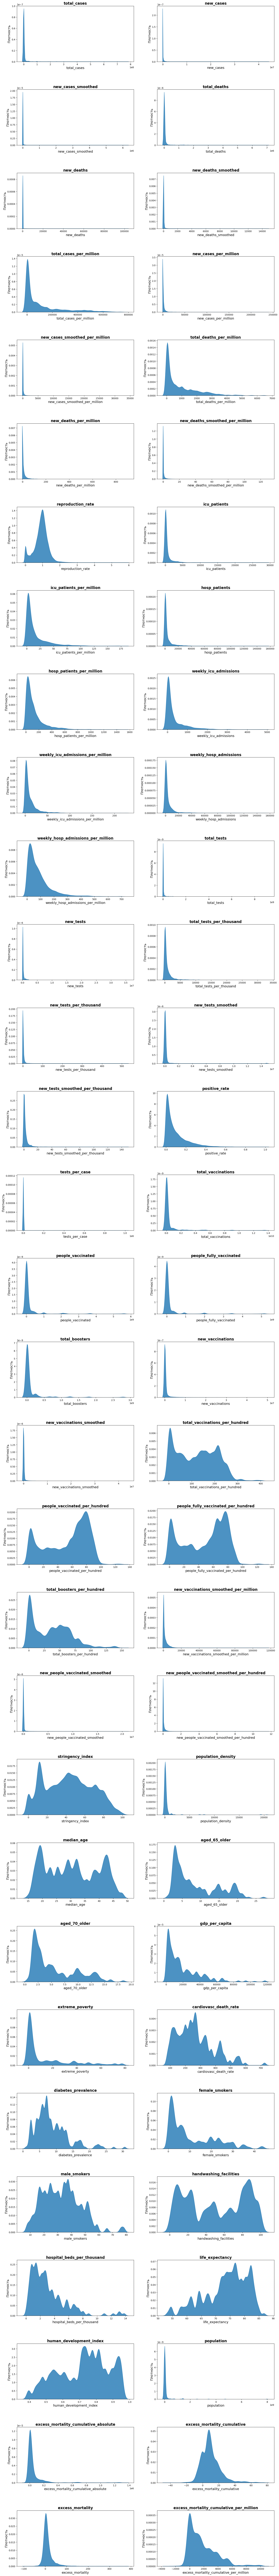

In [14]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(31,2, figsize = (20,200))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns
# Отбираем столбы с типом floate
columns = list(columns[4:])
columns.remove(columns[29])

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    
plt.show()

По данным распределениям можно сделать следующий вывод:
    
    Почти все признаки не имеют нормального распределения.

    В основном их значения имеют экстремум на минимальных значениях, из этого можно сделать вывод, что есть много признаков в которых содержаться выбросы.

    Также имеются признаки в которых два экстремума total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred.

    Также распространённое распределение находится в stringency_index, median_age, male_smokers, handwashing_facilitues.

    Так как распределение ненормальное в дальнейшем необходимо масштабировать данные, а именно нормализовать. После чего избавиться от выбросов, там где это нужно.

### 1.4 Формирование дополнительных атрибутов

Сформируйте отдельный атрибут, в которых будет содержаться анализ распространения вируса
с помощью коэффициента распространения инфекции (Rt = число зарегистрированных
заболеваний за последние 4 дня / число зарегистрированных заболеваний за предыдущие 4
дня). Пример вычисления коэффициента RT приведен на портале: https://gogov.ru/articles/covidrt. Проанализируйте возможность определения изменения эпидемиологической ситуации,
используя сформированный атрибут.

После просмотра данных по всей выборке, можно начать её подготовку к обучению. Начнём с записи столбцов для выборки в главный dataframe.

In [15]:
df = df[need_signs]

In [16]:
# Преобразовываем столбец даты из строки в тип datetime
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
0,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
1,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
2,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
3,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
4,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376917 entries, 0 to 376916
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   location                                    376917 non-null  object        
 1   date                                        376917 non-null  datetime64[ns]
 2   total_cases                                 338085 non-null  float64       
 3   new_cases                                   366116 non-null  float64       
 4   new_cases_smoothed                          364886 non-null  float64       
 5   total_deaths                                316113 non-null  float64       
 6   new_deaths                                  366124 non-null  float64       
 7   new_deaths_smoothed                         364894 non-null  float64       
 8   total_cases_per_million                     338085 non-null  float64      

Теперь в выборке содержится 31 признака, есть данные с типом datetime, 29 колонка с типом float64, и один признак строковый - location.

In [19]:
# отсортируем значения для простоты
df.sort_values(by=['location', 'date'])
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
0,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
1,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
2,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
3,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
4,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376912,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,0.271,351.52,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
376913,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,0.271,351.52,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
376914,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,0.271,351.52,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
376915,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,0.271,351.52,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0


Для начала __просмотрим города__, возможно есть места, где данных слишком мало.

In [20]:
df['location'].value_counts().sort_values()

Western Sahara        1
Northern Cyprus     691
Macao               795
Wales              1198
Scotland           1305
                   ... 
Asia               1508
Sweden             1508
Bulgaria           1508
European Union     1508
Malaysia           1508
Name: location, Length: 255, dtype: int64

In [21]:
df[df['location'] == 'Western Sahara']

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
370932,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576005.0


Можно заметить что по 'Western Sahara' всего она запись, её можем удалить, она не даст нам возможности понять, опасно ли находится там.

In [22]:
# Удаляем строку
df = df[df['location'] != 'Western Sahara']

In [23]:
df[df['location'] == 'Western Sahara']

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


Проверка __пустых значений__ в первых главных для нас столбцах total_cases, new_case, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed - столбцам связанных с заражением.

In [24]:
# df[(df['new_cases'].isna()) & (df['total_cases'].isna()) & (df['total_deaths'].isna()) & (df['new_deaths'].isna())]
df[(df['new_cases'].isna()) & (df['total_cases'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
13428,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.177,31.9,11.198,18933.907,0.6,16.200,27.700,NaN,5.000,0.845,4.551032e+07
13429,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.177,31.9,11.198,18933.907,0.6,16.200,27.700,NaN,5.000,0.845,4.551032e+07
13430,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.177,31.9,11.198,18933.907,0.6,16.200,27.700,NaN,5.000,0.845,4.551032e+07
13431,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.177,31.9,11.198,18933.907,0.6,16.200,27.700,NaN,5.000,0.845,4.551032e+07
17908,Aruba,2024-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,584.800,41.2,13.085,35973.781,NaN,NaN,NaN,NaN,NaN,NaN,1.064590e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372436,World,2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09
372437,World,2024-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09
372438,World,2024-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09
372439,World,2024-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09


Можно увидеть, что в данных столбцах total_cases и new_cases оба равны NaN, но так же в этих строках не заполнены и другие данные связанные с заражением, вероятнее всего это из-за того, что эти данные были удалены либо не добавленны на сайты, от куда парсились. Следовательно эти строки можно просто удалить и не гадать какие должны были быть данные.

In [25]:
present = round(df[(df['new_cases'].isna()) & (df['total_cases'].isna())].shape[0]/df.shape[0]*100, 1)
print(f'Процент удаляемых строк: {present}')

Процент удаляемых строк: 2.6


Процент не превышает 5, поэтому можем спокойно удалять строки.

In [26]:
# Удаляем строки по индексу
index_names = df[(df['new_cases'].isna()) & (df['total_cases'].isna())].index 
df.drop(index_names, inplace = True) 

In [27]:
df[(df['new_cases'].isna()) & (df['total_cases'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


Так же можно удалить данные строки, берём перый месяц, т.к. там ещё не было заражения.

In [28]:
df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
0,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
1,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
2,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
3,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
4,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375425,Zimbabwe,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
375426,Zimbabwe,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
375427,Zimbabwe,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0
375428,Zimbabwe,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.729,19.6,2.822,1899.775,21.4,1.6,30.7,36.791,1.7,0.571,16320539.0


In [29]:
# Удаляем строки по индексу
index_names = df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ].index 
df.drop(index_names, inplace = True) 

In [30]:
df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


В итоге строки с незаполнеными данными удалили, что упростит дальнейший анализ и заполнение пустых значений.

Далее заменим Nan значения в new_cases и new_deaths на 0, так как будем предпологать, в этот день не было информаций о заражениях.

In [31]:
df['new_cases'].fillna(0, inplace=True)
df['new_deaths'].fillna(0, inplace=True)

In [32]:
df[(df['new_cases'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


In [33]:
df[(df['new_deaths'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


Заполнение прошло успешно, теперь можно заполнить total_cases и total_deaths на оснований данных new_cases и new_deaths , т.к. они равны сумме всех new_cases/new_deaths до даты данной строки.

In [34]:
for location, group in df.groupby('location'):
    sum_c= 0
    sum_d= 0
#     берём индекс и строку
    for index, row in group.iterrows():
        sum_c += row['new_cases']
        sum_d += row['new_deaths']
        df.loc[index, 'total_cases'] = sum_c
        df.loc[index, 'total_deaths'] = sum_d

In [35]:
df[df['total_cases'].isna()]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


In [36]:
df[df['total_deaths'].isna()]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


Пустых значений в total_cases и total_deaths не осталось. Дальше идём по списку и просмотрим new_cases_smoothed и new_deaths_smoothed. Тут два варианта: удалим строки с пустыми значениями, если их немного или вычислим сумму new_cases/new_deaths за неделю на определённой местности и разделить это значение на 7.

In [37]:
df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
17912,Asia,2020-01-05,1.0,1.0,NaN,0.0,0.0,NaN,0.000,0.0,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
17913,Asia,2020-01-06,1.0,0.0,NaN,0.0,0.0,NaN,0.000,0.0,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
17914,Asia,2020-01-07,1.0,0.0,NaN,0.0,0.0,NaN,0.000,0.0,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
17915,Asia,2020-01-08,1.0,0.0,NaN,0.0,0.0,NaN,0.000,0.0,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
17916,Asia,2020-01-09,1.0,0.0,NaN,0.0,0.0,NaN,0.000,0.0,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370934,World,2020-01-06,2.0,0.0,NaN,3.0,0.0,NaN,0.000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.130,2.705,0.737,7.975105e+09
370935,World,2020-01-07,2.0,0.0,NaN,3.0,0.0,NaN,0.000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.130,2.705,0.737,7.975105e+09
370936,World,2020-01-08,2.0,0.0,NaN,3.0,0.0,NaN,0.000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.130,2.705,0.737,7.975105e+09
370937,World,2020-01-09,2.0,0.0,NaN,3.0,0.0,NaN,0.000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.130,2.705,0.737,7.975105e+09


Видно, что строк меньше 1000, на выборку они повлияют несильно, но зато упростят нам работу.

In [38]:
# Удаляем строки по индексу
index_names =df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())].index 
df.drop(index_names, inplace = True) 

In [39]:
df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population


In [40]:
data_nan = pd.DataFrame()

columns = df.columns
data_nan.index = columns
# Высчитываем процент пустых значений
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)

data_nan[data_nan['percent'] > 0]

,percent
total_cases_per_million,8.0
total_deaths_per_million,14.0
reproduction_rate,50.0
new_vaccinations_smoothed,50.0
new_vaccinations_smoothed_per_million,50.0
new_people_vaccinated_smoothed,51.0
new_people_vaccinated_smoothed_per_hundred,51.0
stringency_index,47.0
population_density,13.0
median_age,20.0


Далее заполним значения __total_cases_per_million, total_deaths_per_million__

In [41]:
df[(df['total_cases_per_million'] > 0) & (df['total_deaths_per_million'] > 0)].head(5)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
84,Afghanistan,2020-03-29,91.0,67.0,9.571,2.0,2.0,0.286,2.213,1.629,0.233,0.049,0.049,0.007,1.51,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
85,Afghanistan,2020-03-30,91.0,0.0,9.571,2.0,0.0,0.286,2.213,0.000,0.233,0.049,0.000,0.007,1.51,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
86,Afghanistan,2020-03-31,91.0,0.0,9.571,2.0,0.0,0.286,2.213,0.000,0.233,0.049,0.000,0.007,1.52,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
87,Afghanistan,2020-04-01,91.0,0.0,9.571,2.0,0.0,0.286,2.213,0.000,0.233,0.049,0.000,0.007,1.51,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
88,Afghanistan,2020-04-02,91.0,0.0,9.571,2.0,0.0,0.286,2.213,0.000,0.233,0.049,0.000,0.007,1.51,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0


Проанализировав данные можно сделать вывод, что total_cases_per_million равен total_cases делённое на population/1000000, total_deaths_per_million равен total_deaths делённое на population/1000000

In [42]:
df['total_cases_per_million'].fillna(round(df['total_cases']/(df['population']/1000000), 4), inplace=True  )
df['total_deaths_per_million'].fillna(round(df['total_deaths']/(df['population']/1000000), 4), inplace=True  )

In [43]:
print(f"Количество пустых значений \n\ttotal_cases_per_million: {df[df['total_cases_per_million'].isna()].shape[0]}\n\ttotal_deaths_per_million: {df[df['total_deaths_per_million'].isna()].shape[0]}")

Количество пустых значений 
	total_cases_per_million: 0
	total_deaths_per_million: 0


In [44]:
df[(df['total_cases_per_million'] == 0) & (df['total_cases'] != 0) & (df['population'] != 0)]

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
17917,Asia,2020-01-10,1.0,0.0,0.143,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
17918,Asia,2020-01-11,1.0,0.0,0.143,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
357787,Upper middle income,2020-01-10,1.0,0.0,0.143,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
357788,Upper middle income,2020-01-11,1.0,0.0,0.143,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
370938,World,2020-01-10,2.0,0.0,0.286,3.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09
370939,World,2020-01-11,2.0,0.0,0.286,3.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,58.045,30.9,8.696,15469.207,10.0,6.434,34.635,60.13,2.705,0.737,7.975105e+09


Есть некоторые строки где total_cases_per_million равен 0, но этого из-за слишком маленького значения.

Столбец reproduction_rate удалим, так как по заданию нам нужно создать свой столбец коэффициента распространения covid.

In [45]:
df.drop(columns=['reproduction_rate'], inplace=True)

Так же необходимо удалить столбец new_people_vaccinated_smoothed_per_hundred, new_vaccinations_smoothed_per_million, так как не факт, что вакцинация будет влиять на кластеры, и у нас уже есть общие цифры.

In [46]:
df.drop(columns=['new_people_vaccinated_smoothed_per_hundred'], inplace=True)
df.drop(columns=['new_vaccinations_smoothed_per_million'], inplace=True)

In [47]:
df.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population
5,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
6,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
7,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
8,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0
9,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,54.422,18.6,2.581,1803.987,NaN,NaN,NaN,37.746,0.5,0.511,41128772.0


Далее заполним new_vaccinations_smoothed new_people_vaccinated_smoothed нулями, так как будем предпологать, что вакцин на то время не делали.

In [48]:
df['new_vaccinations_smoothed'].fillna(0, inplace=True)
df['new_people_vaccinated_smoothed'].fillna(0, inplace=True)
print(f"Количество пустых значений \n\tnew_vaccinations_smoothed: {df[df['new_vaccinations_smoothed'].isna()].shape[0]}\n\tnew_people_vaccinated_smoothed: {df[df['new_people_vaccinated_smoothed'].isna()].shape[0]}")

Количество пустых значений 
	new_vaccinations_smoothed: 0
	new_people_vaccinated_smoothed: 0


Теперь с помощью группировки необходимо заполнить пустые значения в stringency_index.

Далее оставшиеся колонки заполним средними значениями по локации за год, есть шанс, что таких значений не будет, поэтому заменим их на обычную медиану.

In [49]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [50]:
columns_ = list(df.columns)[16:]
columns_

['stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'gdp_per_capita',
 'extreme_poverty',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'human_development_index',
 'population',
 'month',
 'year']

In [51]:
str_ = ''
for i in columns_:
    indx_loc = df.groupby(['location', 'year'])[i].transform('median')
    df[i].fillna(indx_loc, inplace=True)
    if (df[i].isna().sum() > 0):
        df[i].fillna(df[i].median(), inplace=True)
    str_ += i + ' - ' + str(df[i].isna().sum()) + f'\n'
print('Количество пустых значений:'+ f'\n' + str_)

Количество пустых значений:
stringency_index - 0
population_density - 0
median_age - 0
aged_65_older - 0
gdp_per_capita - 0
extreme_poverty - 0
female_smokers - 0
male_smokers - 0
handwashing_facilities - 0
hospital_beds_per_thousand - 0
human_development_index - 0
population - 0
month - 0
year - 0



In [52]:
# вывод процента значений больше 0
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)
data_nan[data_nan['percent'] > 0]

,percent


Таким образом мы заменили остальные пустые значения в столбцах.

Теперь добавим новый признак RT.

In [53]:
df['RT'] = 0

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
# Функция которая возращает двумерный список: 4 прошлых дня и 4 позапрошлых дня
def fun_date(date_):
    lst_n4 = []
    lst_l4 = []
    for i in range(0, 4):
        lst_n4.append(date_ - datetime.timedelta(days = i))
    for i in range(3, 8):
         lst_l4.append(date_ - datetime.timedelta(days = i))
    return [lst_n4, lst_l4]
        

df_loc = df.groupby('location')

for i in set(df['location'].tolist()):
    df_i = df_loc.get_group(i)
    for index, row in df_i.iterrows():
        lst_d = fun_date(row['date'])
        n4 = df_i[df_i['date'].isin(lst_d[0])]['new_cases'].sum()
        l4 = df_i[df_i['date'].isin(lst_d[1])]['new_cases'].sum()
        if (l4 != 0 & pd.notnull(l4)):
            df.loc[index, 'RT']=round(n4/l4, 3)
            

In [56]:
df[(df['new_cases'] >0) & (df['location'] == 'Congo')].head(30)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population,month,year,RT
69948,Congo,2020-03-15,1.0,1.0,0.143,0.0,0.0,0.000,0.167,0.167,0.024,0.000,0.000,0.000,0.0,0.0,11.11,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,3,2020,0.000
69955,Congo,2020-03-22,3.0,2.0,0.286,0.0,0.0,0.000,0.502,0.335,0.048,0.000,0.000,0.000,0.0,0.0,16.67,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,3,2020,2.000
69962,Congo,2020-03-29,19.0,16.0,2.286,0.0,0.0,0.000,3.182,2.680,0.383,0.000,0.000,0.000,0.0,0.0,80.56,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,3,2020,8.000
69969,Congo,2020-04-05,49.0,30.0,4.286,4.0,4.0,0.571,8.207,5.025,0.718,0.670,0.670,0.096,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,4,2020,1.875
69976,Congo,2020-04-12,70.0,21.0,3.000,4.0,0.0,0.000,11.724,3.517,0.502,0.670,0.000,0.000,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,4,2020,0.700
69983,Congo,2020-04-19,143.0,73.0,10.429,5.0,1.0,0.143,23.951,12.227,1.747,0.837,0.167,0.024,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,4,2020,3.476
69990,Congo,2020-04-26,200.0,57.0,8.143,7.0,2.0,0.286,33.498,9.547,1.364,1.172,0.335,0.048,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,4,2020,0.781
69997,Congo,2020-05-03,229.0,29.0,4.143,9.0,2.0,0.286,38.356,4.857,0.694,1.507,0.335,0.048,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,5,2020,0.509
70004,Congo,2020-05-10,287.0,58.0,8.286,9.0,0.0,0.000,48.070,9.715,1.388,1.507,0.000,0.000,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,5,2020,2.000
70011,Congo,2020-05-17,410.0,123.0,17.571,14.0,5.0,0.714,68.672,20.602,2.943,2.345,0.837,0.120,0.0,0.0,97.22,15.405,19.0,3.402,4881.406,37.0,1.7,52.3,47.964,2.5,0.574,5970430.0,5,2020,2.121


In [57]:
df['RT'].isna().sum()

0

С помощью алгоритма мы заполнили признак RT, пустые значения отсутвуют, если посмтореть на Congo то можно увидеть что всё заполнилось корректно.

### 1.5 Кластеризация набора данных

#### Отбор выборки объектов для кластеризации.

In [58]:
['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'           
,'new_vaccinations_smoothed'     
,'new_people_vaccinated_smoothed'     
,'stringency_index'     
,'population_density'     
,'median_age'                              
,'human_development_index'    
,'population'           
,'RT']

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'total_deaths_per_million',
 'new_vaccinations_smoothed',
 'new_people_vaccinated_smoothed',
 'stringency_index',
 'population_density',
 'median_age',
 'human_development_index',
 'population',
 'RT']

In [59]:
X = df[['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'             
,'population'           
,'RT']]
columns = X.columns

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364876 entries, 0 to 364875
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_cases               364876 non-null  float64
 1   new_cases_smoothed        364876 non-null  float64
 2   total_deaths              364876 non-null  float64
 3   new_deaths_smoothed       364876 non-null  float64
 4   total_cases_per_million   364876 non-null  float64
 5   total_deaths_per_million  364876 non-null  float64
 6   population                364876 non-null  float64
 7   RT                        364876 non-null  float64
dtypes: float64(8)
memory usage: 22.3 MB


Будем использовать столбцы, которые свзяны непосредственно с заражением. Иначе при большем количестве столбцов есть шанс, что кластеры будут больше опираться на другие признаки.

#### Масштабирование

Проведём нормализцию, так как в пункте 1.3 было видно, что данные распределены ненормально.

In [61]:
X[columns] = mms.fit_transform(X[columns])
X.head()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.0


In [62]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,364876.0,0.008452,0.053555,0.0,6.460429e-06,0.000069,0.000854,1.0
new_cases_smoothed,364876.0,0.001424,0.014499,0.0,2.262851e-08,0.000003,0.000069,1.0
total_deaths,364876.0,0.010865,0.060233,0.0,5.152545e-06,0.000098,0.001239,1.0
new_deaths_smoothed,364876.0,0.005401,0.036561,0.0,0.000000e+00,0.000010,0.000289,1.0
total_cases_per_million,364876.0,0.131643,0.201401,0.0,1.950327e-03,0.029047,0.172749,1.0
total_deaths_per_million,364876.0,0.119595,0.166973,0.0,2.637048e-03,0.035274,0.182478,1.0
population,364876.0,0.016456,0.083912,0.0,5.140271e-05,0.000738,0.003713,1.0
RT,364876.0,0.000210,0.002043,0.0,0.000000e+00,0.000000,0.000000,1.0


Нормализация проведена успешно, минимальное значение везде равно 0, а максимальное 1.

#### Определение количества кластеров

Будем использовать метод ближайших соседей, так как выборка слишком большая, метод иерархической кластеризации не подойдёт.

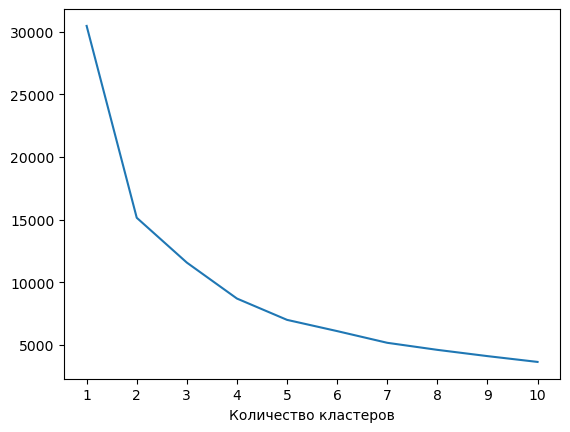

In [63]:
kmean_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
inertia_list = []

for k in range(1, 11):   
    kmeans = KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) 

plt.plot(range(1, 11), inertia_list)  # Corrected variable name
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.show()


По методу локтя видно, что наилучшее количество кластеров равно трём, ну и так как по заданию необходимы три кластера именно это количество мы и будем использовать.

Далее возьмём три метода кластеризаций, которые подойдут для нашей достаточно большой выборки: KMeans, Birch и Gaussian Mixture Model. Иерархические модели нам не подходят, так как они предназначены для более маленьких выборок.

### KMeans

In [64]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

In [65]:
len(labels)

364876

In [66]:
X.shape

(364876, 8)

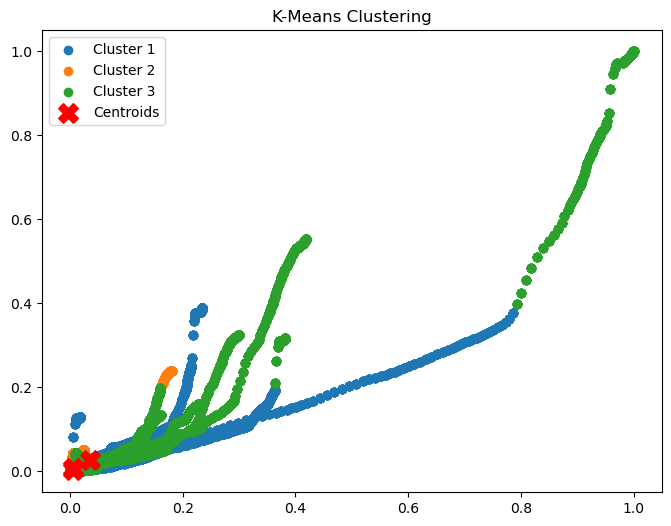

In [67]:
# Assuming you already have labels and centroids from the KMeans clustering
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot of the clustered data points
plt.figure(figsize=(8, 6))
for i in range(len(set(labels))):
    plt.scatter(X.iloc[labels == i, 2], X.iloc[labels == i, 0], label=f'Cluster {i + 1}')

# Scatter plot of the cluster centroids
plt.scatter(centroids[:, 2], centroids[:, 0], marker='X', s=200, color='red', label='Centroids')


plt.title('K-Means Clustering')

plt.legend()
plt.show()


Видим, что центроиды кластеров находятся, почти на одном месте, так же есть какие то выбросы. Оценим кластеризацию с помощью метрик.

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [105]:
davies1 = davies_bouldin_score(X, labels)
davies1

0.9450985222288381

In [69]:
score1 = silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))
score1

0.6055329840608932

In [104]:
calinski1 = calinski_harabasz_score(X, labels)
calinski1

298164.2285331744

Оценка на самом деле плохая, как будто кластеры проставлены наугад, но нужно просмотреть значения из dataframe.

In [71]:
X_look = df[columns]
X_look['date'] = df['date']
X_look['location'] = df['location']

In [72]:
X_look['cluster'] = labels

In [73]:
X_look.shape

(364876, 11)

In [74]:
print(X_look[X_look['cluster'] == 0].shape)
X_look[X_look['cluster'] == 0].head(10)

(251115, 11)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-10,Afghanistan,0
1,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-11,Afghanistan,0
2,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-12,Afghanistan,0
3,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-13,Afghanistan,0
4,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-14,Afghanistan,0
5,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-15,Afghanistan,0
6,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-16,Afghanistan,0
7,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-17,Afghanistan,0
8,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-18,Afghanistan,0
9,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-19,Afghanistan,0


In [75]:
print(X_look[X_look['cluster'] == 1].shape)
X_look[X_look['cluster'] == 1].head(10)

(42308, 11)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster
8165,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,1.327,2022-01-09,Andorra,1
8166,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-10,Andorra,1
8167,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-11,Andorra,1
8168,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,1.000,2022-01-12,Andorra,1
8169,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-13,Andorra,1
8170,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-14,Andorra,1
8171,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-15,Andorra,1
8172,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,1.304,2022-01-16,Andorra,1
8173,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-17,Andorra,1
8174,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-18,Andorra,1


In [76]:
print(X_look[X_look['cluster'] == 2].shape)
X_look[X_look['cluster'] == 2].head(10)

(71453, 11)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster
3753,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.599,2022-02-27,Albania,2
3754,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.000,2022-02-28,Albania,2
3755,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.000,2022-03-01,Albania,2
3756,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,1.000,2022-03-02,Albania,2
3757,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.000,2022-03-03,Albania,2
3758,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.000,2022-03-04,Albania,2
3759,271314.0,201.429,3460.0,3.857,95455.188,1217.316,2842318.0,0.000,2022-03-05,Albania,2
3760,272030.0,102.286,3478.0,2.571,95707.095,1223.649,2842318.0,0.508,2022-03-06,Albania,2
3761,272030.0,102.286,3478.0,2.571,95707.095,1223.649,2842318.0,0.000,2022-03-07,Albania,2
3762,272030.0,102.286,3478.0,2.571,95707.095,1223.649,2842318.0,0.000,2022-03-08,Albania,2


Просмотрев значения, можно сделать вывод:

__Кластер 0__: безопасное нахождение, имеет меньшие значения заражения, 251087 значений;

__Кластер 1__: небезопасное нахождение, имеет средние значения заражения, 71495 значений;

__Кластер 2__: опасность нахождения, имеет сильное заражения и смертность, 42294 значений.

Оценка силуэта метрики 0.68, достаточно мало, так же можно увидеть, что центроиды кластеров находятся практически друг на друге, и значения кластеров расскиданы не правильно.

### Birch

In [77]:
# Уменьшение размерности датафрейма до 2-х измерений

pca = PCA(n_components=2)
pca.fit(X)

x_pca = pca.transform(X)
np.shape(x_pca)

(364876, 2)

In [78]:
# Получение распределения от Birch


brc = Birch(threshold=0.01, n_clusters=3)
brc.fit(x_pca)

yhat_br = brc.predict(x_pca)
cluster_brc = pd.unique(yhat_br)
print('Кластеры метода Birch:',cluster_brc )
labels2 = brc.labels_

Кластеры метода Birch: [1 0 2]


In [79]:
# Просмотр того, как распределились данные 
label = pd.Series(yhat_br)
label.value_counts()

1    298497
0     44097
2     22282
dtype: int64

Text(0, 0.5, 'Second Principal Component')

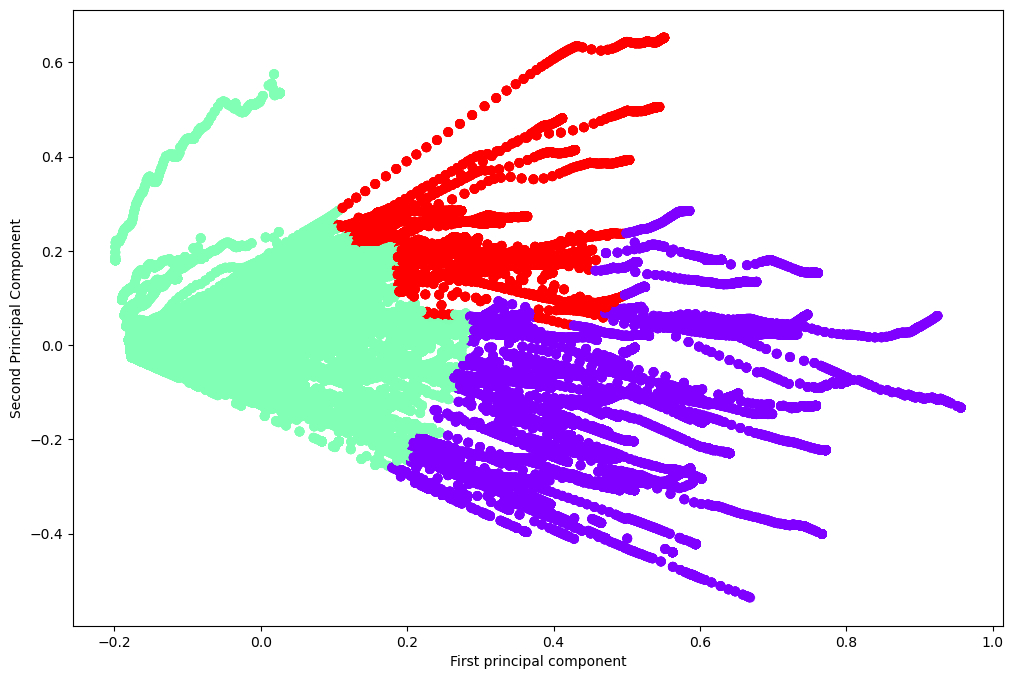

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=yhat_br,cmap='rainbow', alpha=0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Данная интерпретация кластеров выглядит лучше, хотя смучает, что значения кластеров распределены неравномерно, где-то больше, где-то меньше.

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [81]:
score2 = silhouette_score(X, labels2, metric='euclidean', sample_size=len(X))
score2

0.6037938008102709

In [106]:
davies2 = davies_bouldin_score(X, labels2)
davies2

0.8526338562113472

In [107]:
calinski2 = calinski_harabasz_score(X, labels2)
calinski2

232274.8013007548

Оценка лучше, чем у прошлого метода, но до сих пор храмает.

In [84]:
X_look['cluster2'] = labels2

In [85]:
print(X_look[X_look['cluster2'] == 0].shape)
X_look[X_look['cluster2'] == 0].head(10)

(44097, 12)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2
8158,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,1.702,2022-01-02,Andorra,2,0
8159,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,2022-01-03,Andorra,2,0
8160,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,2022-01-04,Andorra,2,0
8161,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,1.000,2022-01-05,Andorra,2,0
8162,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,2022-01-06,Andorra,2,0
8163,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,2022-01-07,Andorra,2,0
8164,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,2022-01-08,Andorra,2,0
8165,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,1.327,2022-01-09,Andorra,1,0
8166,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-10,Andorra,1,0
8167,26408.0,381.143,141.0,0.143,330749.095,1765.966,79843.0,0.000,2022-01-11,Andorra,1,0


In [86]:
print(X_look[X_look['cluster2'] == 1].shape)
X_look[X_look['cluster2'] == 1].head(10)

(298497, 12)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2
0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-10,Afghanistan,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-11,Afghanistan,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-12,Afghanistan,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-13,Afghanistan,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-14,Afghanistan,0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-15,Afghanistan,0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-16,Afghanistan,0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-17,Afghanistan,0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-18,Afghanistan,0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-19,Afghanistan,0,1


In [87]:
print(X_look[X_look['cluster2'] == 2].shape)
X_look[X_look['cluster2'] == 2].head(10)

(22282, 12)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2
14106,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,3.019,2022-01-02,Argentina,2,2
14107,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,0.000,2022-01-03,Argentina,2,2
14108,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,0.000,2022-01-04,Argentina,2,2
14109,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,1.000,2022-01-05,Argentina,2,2
14110,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,0.000,2022-01-06,Argentina,2,2
14111,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,0.000,2022-01-07,Argentina,2,2
14112,5821928.0,37430.286,118251.0,60.143,127925.435,2598.334,45510324.0,0.000,2022-01-08,Argentina,2,2
14113,6469649.0,92531.571,119254.0,143.286,142157.832,2620.372,45510324.0,2.472,2022-01-09,Argentina,2,2
14114,6469649.0,92531.571,119254.0,143.286,142157.832,2620.372,45510324.0,0.000,2022-01-10,Argentina,2,2
14115,6469649.0,92531.571,119254.0,143.286,142157.832,2620.372,45510324.0,0.000,2022-01-11,Argentina,2,2


Просмотрев значения, можно сделать вывод:

__Кластер 0__: средняя опасность нахождения, имеет среднее заражения и большую смертность, 44097 значений;

__Кластер 1__: безопасное нахождение, имеет меньшие значения заражения, 298497 значений;

__Кластер 2__:  опасность нахождения, имеет опасное заражение и смертность, 22282 значений.

Хоть оценка метрики 0.75 и значения в кластерах соответвуют распределению на кластеры, они распределились неравномерно и получилось так, что в "опасной зоне" находится 2000 значений, а в "безопасной зоне" 300 тысяч значений.

### Gaussian Mixture Model

In [88]:
# Получение распределения от GaussianMixture

gmm = GaussianMixture(3, covariance_type='tied', random_state=33).fit(x_pca)

labels3 = gmm.predict(x_pca)

Text(0, 0.5, 'Second Principal Component')

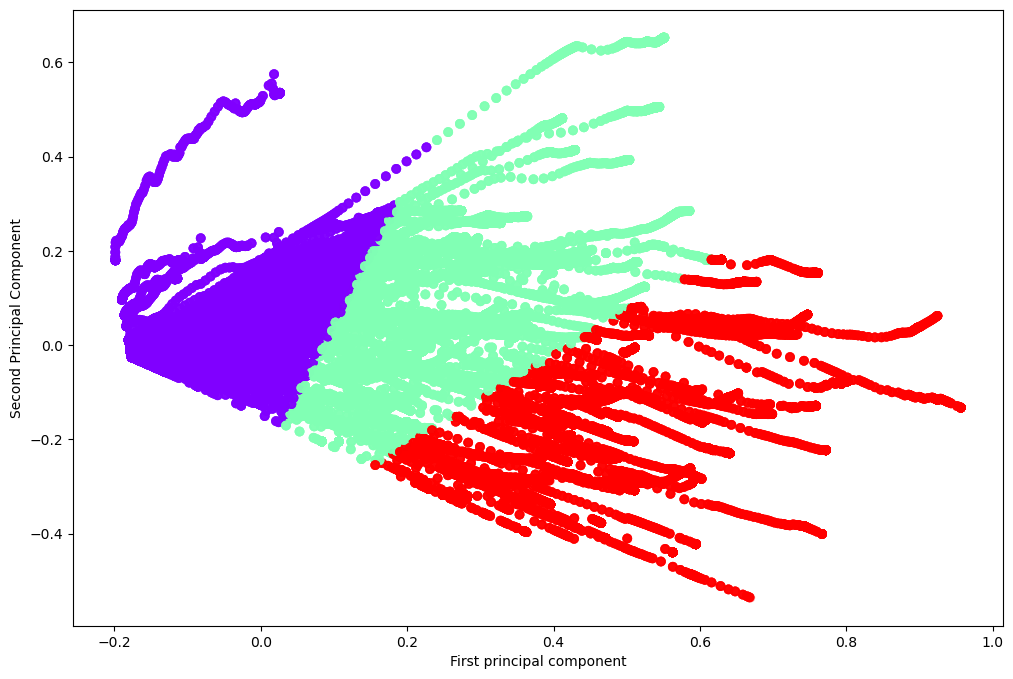

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels3,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Использовали в гаусовском методе covariance_type='tied', и имеем вполне логичное расспрделение.

In [90]:
labels3 = pd.Series(labels3)
labels3.value_counts()

0    272870
1     55957
2     36049
dtype: int64

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [91]:
score3 = silhouette_score(X, labels3, 
                metric='euclidean')
score3

0.5854148626670005

In [108]:
davies3 = davies_bouldin_score(X, labels3)
davies3

1.0110652478767315

In [109]:
calinski3 = calinski_harabasz_score(X, labels3)
calinski3

264098.9025713382

Оценка в разы хуже, чем у прошлых методов кластеризаций.

In [94]:
X_look['cluster3'] = labels3

In [95]:
print(X_look[X_look['cluster3'] == 0].shape)
X_look[X_look['cluster3'] == 0].head(10)

(272870, 13)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2,cluster3
0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-10,Afghanistan,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-11,Afghanistan,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-12,Afghanistan,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-13,Afghanistan,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-14,Afghanistan,0,1,0
5,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-15,Afghanistan,0,1,0
6,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-16,Afghanistan,0,1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-17,Afghanistan,0,1,0
8,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-18,Afghanistan,0,1,0
9,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,2020-01-19,Afghanistan,0,1,0


In [96]:
print(X_look[X_look['cluster3'] == 1].shape)
X_look[X_look['cluster3'] == 1].head(10)

(55957, 13)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2,cluster3
6867,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-17,American Samoa,0,1,1
6868,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-18,American Samoa,0,1,1
6869,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-19,American Samoa,0,1,1
6870,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,1.0,2022-07-20,American Samoa,0,1,1
6871,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-21,American Samoa,0,1,1
6872,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-22,American Samoa,0,1,1
6873,7468.0,137.571,33.0,0.286,168596.907,745.005,44295.0,0.0,2022-07-23,American Samoa,0,1,1
6874,7468.0,0.000,33.0,0.000,168596.907,745.005,44295.0,0.0,2022-07-24,American Samoa,0,1,1
6875,7468.0,0.000,33.0,0.000,168596.907,745.005,44295.0,0.0,2022-07-25,American Samoa,0,1,1
6876,7468.0,0.000,33.0,0.000,168596.907,745.005,44295.0,0.0,2022-07-26,American Samoa,0,1,1


In [97]:
print(X_look[X_look['cluster3'] == 2].shape)
X_look[X_look['cluster3'] == 2].head(10)

(36049, 13)


,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,date,location,cluster,cluster2,cluster3
8172,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,1.304,2022-01-16,Andorra,1,0,2
8173,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-17,Andorra,1,0,2
8174,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-18,Andorra,1,0,2
8175,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,1.000,2022-01-19,Andorra,1,0,2
8176,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-20,Andorra,1,0,2
8177,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-21,Andorra,1,0,2
8178,29888.0,497.143,142.0,0.143,374334.632,1778.490,79843.0,0.000,2022-01-22,Andorra,1,0,2
8179,33025.0,448.143,144.0,0.286,413624.238,1803.539,79843.0,0.901,2022-01-23,Andorra,1,0,2
8180,33025.0,448.143,144.0,0.286,413624.238,1803.539,79843.0,0.000,2022-01-24,Andorra,1,0,2
8181,33025.0,448.143,144.0,0.286,413624.238,1803.539,79843.0,0.000,2022-01-25,Andorra,1,0,2


Просмотрев значения, можно сделать вывод:

__Кластер 0__: безопасное нахождение (в основном заражения и смертность на 0), имеет меньшие значения заражения, 272870 значений;

__Кластер 1__: небезопасное нахождение (в основном заражения на 1000 за неделю), имеет меньшие значения заражения, 55957 значений;

__Кластер 2__: опасность нахождения (заражение на неделю в районе 3000), имеет среднее заражения и смертность, 36049 значений.

Итого гаусовский метод имеют силуэт метрики: 0.69, кластеры так же распределены в непропорциональном количестве, но значения вполне логичные.

#### Метрики кластеризаций

Сравним метрики, чтобы выбрать лучший метод кластеризаций для выборки.

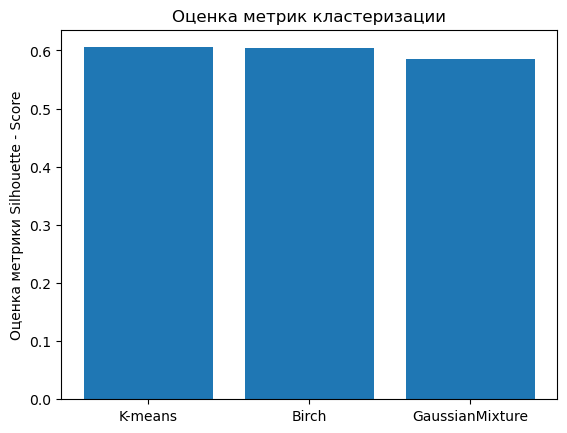

In [111]:
# Создание списка со значениями метрик
metric_values = [score1, score2, score3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики Silhouette - Score')

# Показать график
plt.show()

Силуэтная метрика вызывает больше всего доверия, и можно увидеть, что лучшие модели здесь будут K-means и Birch.

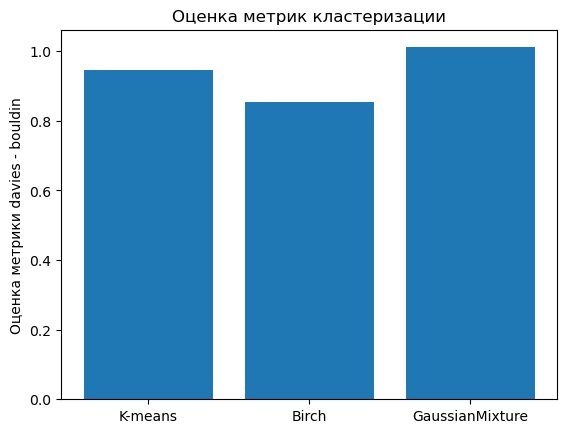

In [110]:
# Создание списка со значениями метрик
metric_values = [davies1, davies2, davies3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики davies - bouldin')

# Показать график
plt.show()

В данной метрике, чем ниже значение, тем лучше модель, из этого делает вывод что Birch выигрывает.

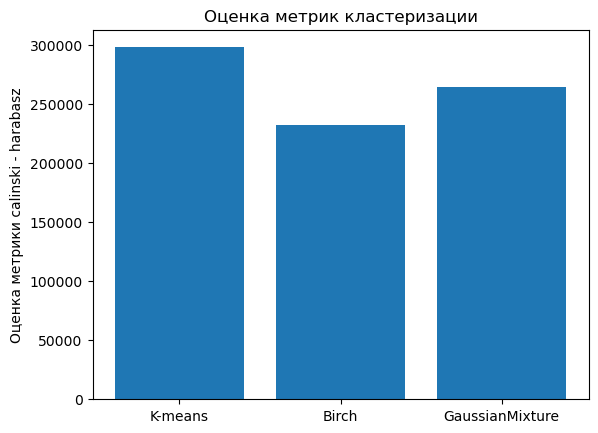

In [112]:
# Создание списка со значениями метрик
metric_values = [calinski1, calinski2, calinski3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики calinski - harabasz')

# Показать график
plt.show()

В данном случае, K-means является лучшей моделью, НО в прошлых критериях она сильно проигрывала, и распределение этих кластеров, сильно не равномерное, поэтому будем считатть лучшей молью Birch.

#### Лучшая модель - Birch

В итоге самой лучшей моделью, оказалась модель Birch, она имеет лучший метрику в 0.75, центроиды в ней распределены на нормальном расстроянии, в отличии от KMeans, к сожалению, в ней неравномерно распредены значения в кластерах, но такая же ситуация и с остальными моделями.

Запишем столбец с уровнем опасности по кластерам модели Birch.

In [98]:
clus = {0: 'средняя', 1: 'безопасно', 2: 'опасно'}
df['hazard_level'] = X_look['cluster2'].map(clus)

In [99]:
df.sample(15)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population,month,year,RT,hazard_level
243843,Oceania,2021-03-04,58516.0,0.0,55.429,1233.0,0.0,0.429,1299.234,0.000,1.231,27.376,0.000,0.010,9073.0,8803.0,42.59,88.125,29.6,6.293,12236.706,2.5,6.3,33.1,49.6905,2.50,0.740,45038860.0,3,2021,0.00,безопасно
280874,Saint Vincent and the Grenadines,2020-10-16,64.0,0.0,0.000,0.0,0.0,0.000,615.627,0.000,0.000,0.000,0.000,0.000,0.0,0.0,42.59,281.787,31.8,7.724,10727.146,2.5,6.3,33.1,49.6905,2.60,0.738,103959.0,10,2020,0.00,безопасно
270966,Rwanda,2022-03-01,129485.0,0.0,16.571,1457.0,0.0,0.286,9398.839,0.000,1.203,105.758,0.000,0.021,100566.0,6671.0,63.28,494.869,20.3,2.974,1854.211,56.0,4.7,21.0,4.6170,2.50,0.543,13776702.0,3,2022,0.00,безопасно
248771,Palau,2022-06-14,5145.0,0.0,8.857,6.0,0.0,0.000,284505.640,0.000,489.778,331.785,0.000,0.000,0.0,0.0,42.59,47.237,29.6,6.293,13240.405,2.5,7.7,22.7,49.6905,4.80,0.826,18084.0,6,2022,0.00,безопасно
67800,Colombia,2022-06-19,6131657.0,13810.0,1972.857,139918.0,24.0,3.429,118202.832,266.222,38.032,2697.265,0.463,0.066,43920.0,3796.0,19.44,44.223,32.2,7.646,13254.949,4.5,4.7,13.5,65.3860,1.71,0.767,51874028.0,6,2022,1.58,опасно
324782,Timor,2023-07-13,23458.0,0.0,0.143,138.0,0.0,0.000,17489.029,0.000,0.107,102.885,0.000,0.000,52.0,18.0,42.59,87.176,18.0,3.556,6570.102,30.3,6.3,78.1,28.1780,5.90,0.606,1341298.0,7,2023,0.00,безопасно
165841,Kazakhstan,2023-05-17,1502857.0,0.0,0.000,19072.0,0.0,0.000,77474.851,0.000,0.000,983.194,0.000,0.000,0.0,0.0,42.59,6.681,30.6,6.991,24055.588,0.1,7.0,43.1,98.9990,6.70,0.825,19397998.0,5,2023,0.00,безопасно
7370,American Samoa,2023-12-02,8359.0,0.0,0.000,34.0,0.0,0.000,188712.044,0.000,0.000,767.581,0.000,0.000,0.0,0.0,42.59,278.205,29.6,6.293,12236.706,2.5,6.3,33.1,49.6905,2.50,0.740,44295.0,12,2023,0.00,безопасно
231708,Niger,2020-07-08,1088.0,0.0,2.857,92.0,0.0,0.143,41.514,0.000,0.109,3.510,0.000,0.005,0.0,0.0,25.93,16.955,15.1,2.553,926.000,44.5,0.1,15.4,8.9780,0.30,0.394,26207982.0,7,2020,1.00,безопасно
280945,Saint Vincent and the Grenadines,2020-12-26,100.0,0.0,0.857,0.0,0.0,0.000,961.918,0.000,8.245,0.000,0.000,0.000,0.0,0.0,42.59,281.787,31.8,7.724,10727.146,2.5,6.3,33.1,49.6905,2.60,0.738,103959.0,12,2020,0.00,безопасно


In [100]:
# Записываем df в файл
df.to_csv(r'result_1.csv', index=False, encoding='utf-8')

### 1.6 Подготовка отчета

### Вывод

__1.1 Парсинг данных__

Для начала спарсили данные с а owid-covid-data.csv репозитория https://github.com/owid, и построили по ним датасет. Просмотрели все атрибуты.

__1.2 Предобработка данных и выделение значимых атрибутов__

Определились с нужными для выборки атрибутами. Использовали такие параметры как пропущенные значения и корреляцию.

__1.3  Описание структуры набора данных__

Прописали описание всех атрибутов. Проанализировали сам датасет на нормальность, и увидели, что распределение не являться нормальным, поэтому далее нормализовали выборку.

__1.4 Формирование дополнительных атрибутов__

Убрали не нужные атрибуты по п. 1.2. Добали атрибут для оценки распространения болезни, с помощью алгоритма, вычисляя значения по формуле.

__1.5 Кластеризация набора данных__

Нормализовали выборку и оставили нужные атрибуты. Определили кластеры - группы опасности, нахождения в то или иное время в стране(городе), лучшей моделью оказалась модель Birch. 

__1.6 Подготовка отчета__

Создали отчёт Report.html + Report.ipynb и файл Readme.txt, записали всё в Data.zip.